<a href="https://colab.research.google.com/github/gorniakowski/fast_ai/blob/master/duster_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Czołem. W dzisiejszym odcinku zrobimy prostą ACHTUNG ! AI.

W zasadzie jest to przeróbka pracy tych gości:
Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

Najsampierw storzyć musim kolekcje danych, coby głab uczyć miał się z czego.

## A lista linków potrzebna jest

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button. Then continue scrolling until you cannot scroll anymore. The maximum number of images Google Images shows is 700.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [1]:
!pip install git+https://github.com/fastai/fastai.git
from fastai import *
from fastai.vision import *
from google.colab import files

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-dnqno79e
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-dnqno79e
  Stored in directory: /tmp/pip-ephem-wheel-cache-5u5ie7nv/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
  Found existing installation: fastai 1.0.52
    Uninstalling fastai-1.0.52:
      Successfully uninstalled fastai-1.0.52


Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [32]:
folder = 'duster'
file = 'duster.txt'
path = Path('data/images/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
files.upload()

Saving duster.txt to duster.txt


{'duster.txt': b'https://www.cdn.daciagroup.com/content/dam/Dacia/master/vehicles/duster/hjd-duster/duster-ph1/overview/dacia-duster-design-004.jpg.ximg.l_full_m.smart.jpg\nhttps://apollo-ireland.akamaized.net/v1/files/eyJmbiI6Im15OGNoZXh4OWJlYi1PVE9NT1RPUEwifQ.7Utq_wr0BlR4Y74DkXPpnC4OBSnkaQLdUzp0L_7of5U/image;s=1080x720;cars_;/855981250_;slot=14;filename=eyJmbiI6Im15OGNoZXh4OWJlYi1PVE9NT1RPUEwifQ.7Utq+wr0BlR4Y74DkXPpnC4OBSnkaQLdUzp0L+7of5U_rev001.jpg\nhttps://otomotopl-imagestmp.akamaized.net/images_otomotopl/884217027_1_1080x720_od-reki-navi-kamery-prestige-16-sce-115-katowice.jpg\nhttps://3.allegroimg.com/original/03870e/9b429d4f4807b0764e1be5f56433\nhttps://upload.wikimedia.org/wikipedia/commons/c/c9/2018_Dacia_Duster.jpg\nhttps://www.cdn.daciagroup.com/content/dam/Dacia/PL/vehicles/duster/nowy-duster/specifications/duster_access.jpg.ximg.c1h.confDT.jpg\nhttps://i.wpimg.pl/315x0/m.autokult.pl/duster-8-a23db68cb75d6515e8dba68.jpg\nhttps://cdn.francuskie.pl/wp-content/uploads/2018/12

In [34]:
folder1 = 'cars'
file1 = 'cars.txt'
path1 = Path('data/images/')
dest1 = path1/folder1
dest1.mkdir(parents=True, exist_ok=True)
files.upload()

Saving cars.txt to cars.txt


{'cars.txt': b"https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1249245835196943\nhttps://s.yimg.com/ny/api/res/1.2/kHWEHhPiBYiTcy7X2m971w--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/http://media.zenfs.com/en-US/homerun/us.autos.jdpower/fb6bd30aa63c312292f30edcba2cf35f\nhttps://media.whatcar.com/wc-image/2019-03/smmt.jpg\nhttps://enthusiastnetwork.s3.amazonaws.com/uploads/sites/5/2014/10/2012-Chevrolet-Camaro-front-left.jpg?impolicy=modalgallerythumb\nhttps://i.ytimg.com/vi/_youDwsqFn8/maxresdefault.jpg\nhttps://cars.usnews.com/dims4/USNEWS/51dac70/2147483647/resize/640x420%3E/format/jpeg/quality/85/?url=https%3A%2F%2Fcars.usnews.com%2Fstatic%2Fimages%2Farticle%2F201611%2F126310%2F2017-Chevrolet-Corvette-GrandSport-009_640x420.jpg\nhttps://cdn.motor1.com/images/mgl/Ojn7e/s3/corvette-instagram-lead.jpg\nhttps://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fjoannmuller%2Ffiles%2F2018%2F01%2Fhonda-crv-1200x800.jpg\nhttps://www.carmax.com/~/media/images

You will need to run this line once per each category.

In [35]:
!ls
!mv cars.txt data/images/cars
!mv duster.txt data/images/duster

 cars.txt   duster.txt						 sample_data
 data	   'Miliardy, miliardy. Rozmyslania - Carl Sagan.azw3'


Finally, upload your urls file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![](https://github.com/fastai/course-v3/blob/sagemaker-ebs-volume/nbs/dl1/images/download_images/upload.png?raw=1)

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images than can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [36]:
download_images(path/folder/file, dest, max_pics=300)
download_images(path1/folder1/file1, dest1, max_pics=300)

Error https://superauto24.com/files/temp/cars-galmed-40894/1526995499_642_441_1.jpg HTTPSConnectionPool(host='superauto24.com', port=443): Max retries exceeded with url: /files/temp/cars-galmed-40894/1526995499_642_441_1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://superauto24.com/files/temp/cars-galmed-39968/1524657295_642_441_1.jpg HTTPSConnectionPool(host='superauto24.com', port=443): Max retries exceeded with url: /files/temp/cars-galmed-39968/1524657295_642_441_1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://superauto24.com/files/temp/cars-galmed-49224/1544542876_642_441_1.jpg HTTPSConnectionPool(host='superauto24.com', port=443): Max retries exceeded with url: /files/temp/cars-galmed-49224/1544542876_642_441_1.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'

Error http://www.autoguide.com/blog/wp-content/uploads//2018/05/top-10-most-popular-cars-for-millennials.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f6cc446d0b8>: Failed to establish a new connection: [Errno 111] Connection refused',))
Error https://www.carmax.com/~/media/images/carmax/com/Articles/most-popular-cars-under-20k/10-chevrolet-camaro.png?la=en&hash=2DA1570183BEBEF4AA9E92EFEAA24434BB788AB5 HTTPSConnectionPool(host='www.carmax.com', port=443): Read timed out. (read timeout=4)
Error https://www.carmax.com/~/media/images/carmax/com/Articles/most-popular-cars-under-20k/12-dodge-charger.png?la=en&hash=0B6091B56AFF2AA9306638E38E5DEC8D1BA37B58 HTTPSConnectionPool(host='www.carmax.com', port=443): Read timed out. (read timeout=4)
Error https://www.autoguide.com/blog/wp-content/uploads/2018/05/2018-ford-f-150.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max ret

Good! Let's take a look at some of our pictures then.

In [0]:
classes = ['duster','cars']

In [38]:
global_path = Path('data/images')
for c in classes:
    print(c)
    verify_images(global_path/c, delete=True, max_workers=8)

duster


cannot identify image file <_io.BufferedReader name='data/images/duster/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/duster/00000207.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/duster/00000035.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/duster/00000014.jpg'>
cars


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/images/cars/00000292.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000044.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000235.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000195.png'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000110.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000290.png'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000015.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000041.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/cars/00000122.jpg'>
cannot identify image file <_io.BufferedReader name='data/images/

In [40]:
!ls data/images/duster

00000000.jpg   00000063.jpg   00000123.jpg   00000184.jpg   00000245.jpg
00000001.jpg   00000064.jpg   00000124.jpg   00000185.jpg   00000246.jpg
00000002.jpg   00000065.jpg   00000125.jpg   00000186.jpg   00000247.jpg
00000003.jpg   00000066.jpg   00000126.jpg   00000187.jpeg  00000248.jpg
00000004.jpg   00000067.jpg   00000127.jpeg  00000188.jpg   00000249.jpg
00000005.jpg   00000068.jpg   00000128.jpg   00000189.jpg   00000250.jpg
00000006.jpg   00000069.jpg   00000129.jpg   00000190.png   00000251.jpg
00000007.jpg   00000070.jpg   00000130.jpg   00000191.jpg   00000252.jpg
00000008.jpg   00000071.jpg   00000131.jpeg  00000192.jpg   00000253.jpg
00000009.jpg   00000072.JPG   00000133.jpg   00000193.jpg   00000254.axd
00000010.jpg   00000073.jpg   00000134.jpg   00000194.jpg   00000255.jpg
00000011.jpg   00000074.jpg   00000135.jpg   00000195.jpg   00000256.jpg
00000012.jpg   00000075.jpg   00000136.jpg   00000196.jpg   00000257.jpg
00000013.jpg   00000076.axd   00000137.jpg   000001

## View data

In [0]:
np.random.seed(42) #słow wyjaśnienia: czyni randmowe numery nierandomowymi, dzieki czemu pracujemy na tym samym bloku walidacji.
                   # zmieniając argument zmieniamy blok walidacji
data = ImageDataBunch.from_folder('data/images', train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [42]:
data.classes

['cars', 'duster']

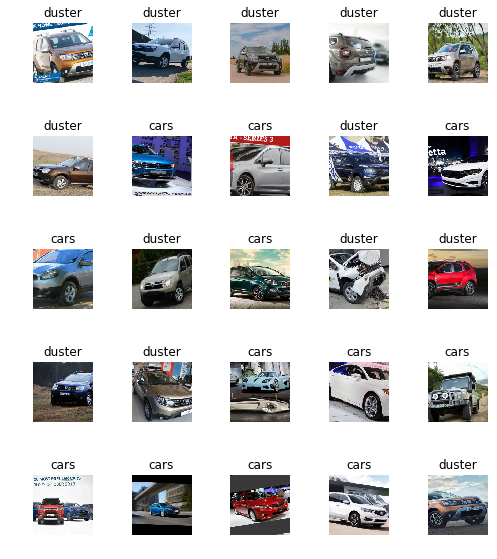

In [43]:
data.show_batch(rows=5, figsize=(7,8))

In [44]:
data.classes, data.c

(['cars', 'duster'], 2)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [47]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.610740,0.347870,0.160714,00:32
1,0.432015,0.333985,0.116071,00:29
2,0.355134,0.296073,0.098214,00:30
3,0.283989,0.287350,0.107143,00:30


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


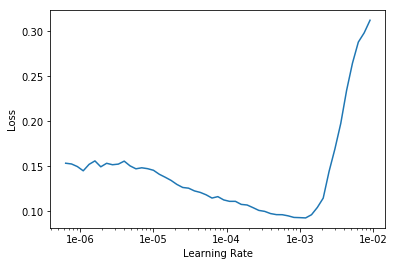

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(2, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.172766,0.432724,0.116071,00:30
1,0.190510,0.308578,0.080357,00:32


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

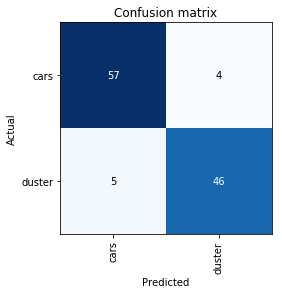

In [55]:
interp.plot_confusion_matrix()

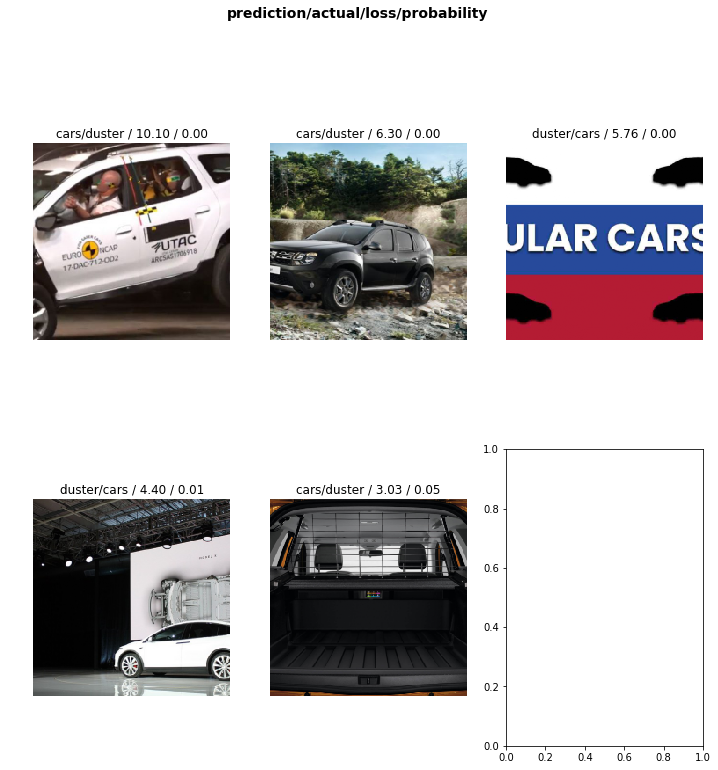

In [56]:
interp.plot_top_losses(5, heatmap = False)